In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [31]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import PowerTransformer

In [32]:
df = pd.read_csv('concrete_data.csv')

In [33]:

df.head()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [34]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [35]:
df.describe

<bound method NDFrame.describe of       Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  Strength  
0               1040.0           676.0   28     79.99  
1            

In [36]:
x=df.drop(columns=['Strength'])
y=df.iloc[:,-1]

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
xtrain

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [49]:

# Applying Regression without any transformation
lr = LinearRegression()

lr.fit(xtrain,ytrain)

y_pred = lr.predict(xtest)

r2_score(ytest,y_pred)

0.6275531792314852

In [50]:

# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2'))

0.4609940491662864

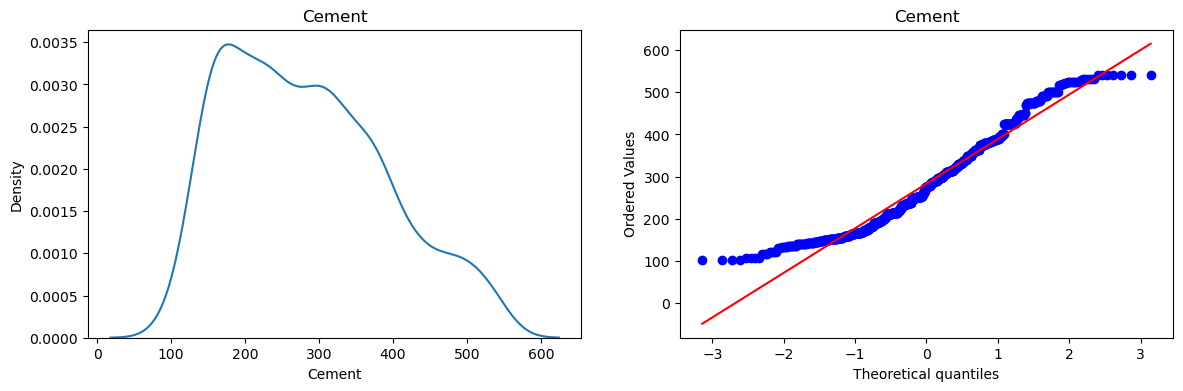

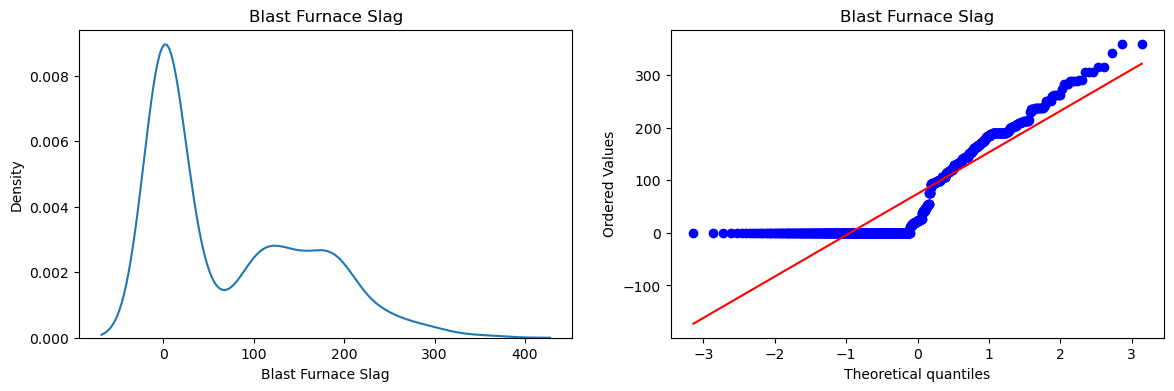

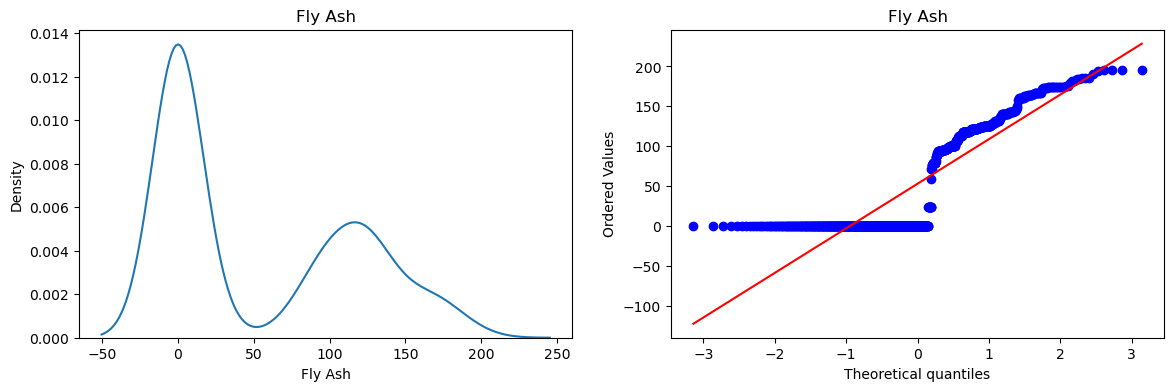

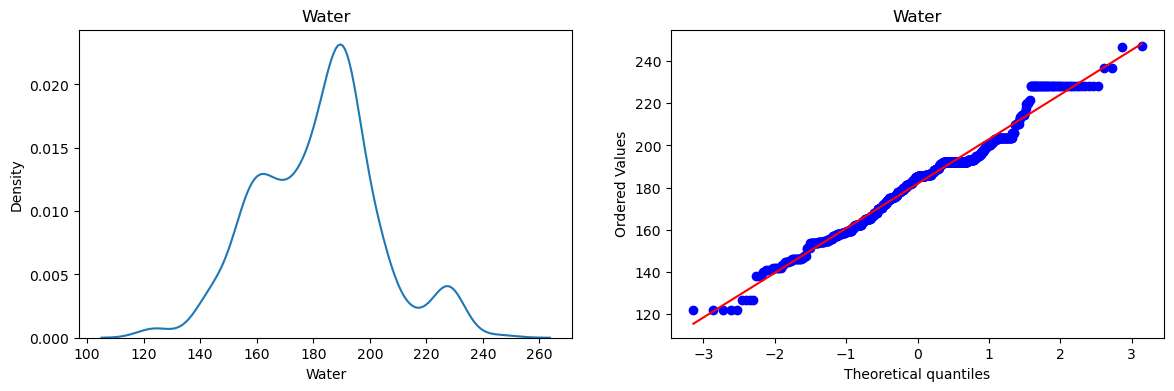

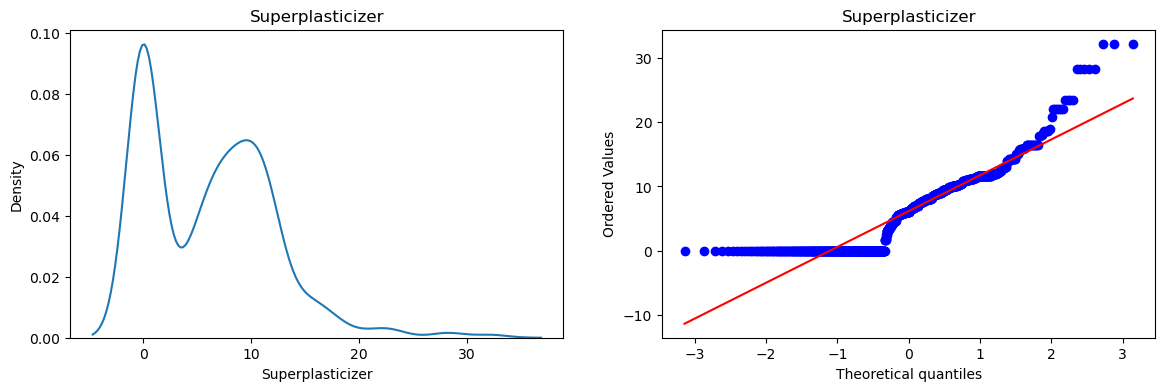

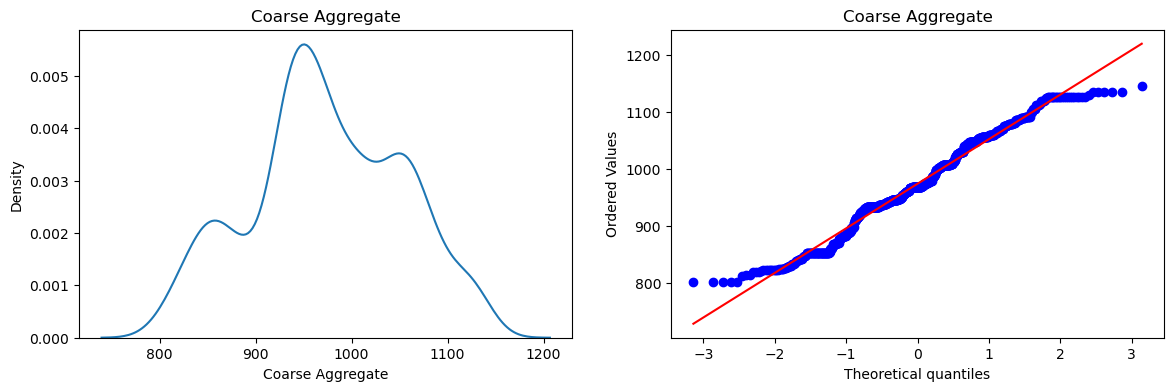

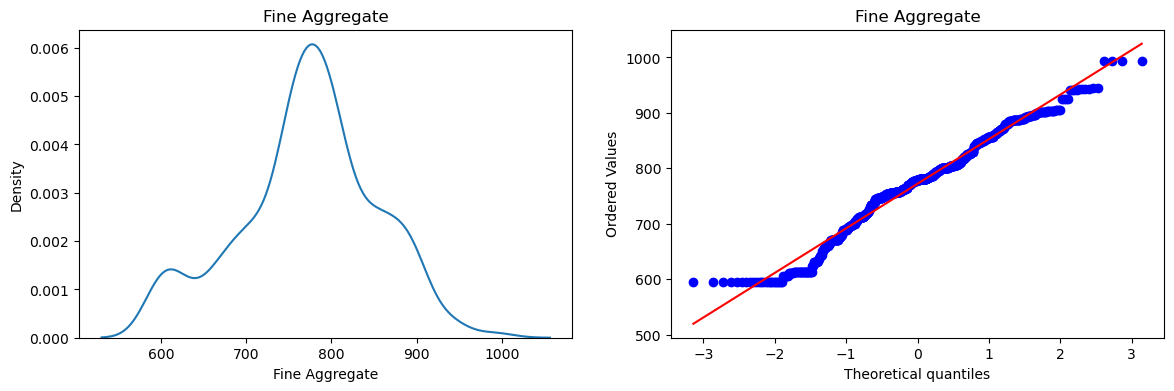

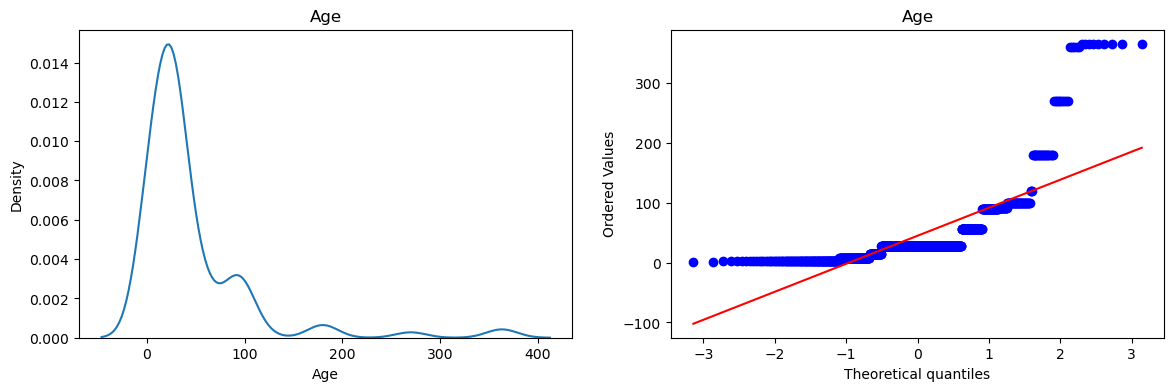

In [51]:
# Plotting the distplots without any transformation

for col in xtrain.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(xtrain[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(xtrain[col], dist="norm", plot=plt)
    plt.title(col)


In [52]:

# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

xtrain_transformed = pt.fit_transform(xtrain+0.000001)#can handel zero values
xtest_transformed = pt.transform(xtest+0.000001)

pd.DataFrame({'cols':xtrain.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [53]:
pd.DataFrame(xtrain_transformed)

,0,1,2,3,4,5,6,7
0,-1.279751,0.956151,1.128045,-0.301920,0.898506,-0.262500,-0.677568,0.106010
1,1.244706,0.701994,1.137577,-0.165055,0.749235,-1.912728,-0.314062,0.106010
2,0.079842,-1.085667,1.131407,-1.047291,0.788486,1.018407,0.025957,-1.675970
3,-0.145641,0.898125,1.096514,0.581224,0.733792,-1.750779,0.583253,0.106010
4,-1.131044,0.787203,1.133149,-1.105297,0.811152,1.368575,0.262623,-1.675970
...,...,...,...,...,...,...,...,...
819,0.183601,0.997079,-0.887212,-1.769923,0.820684,0.390563,0.358776,-1.675970
820,-0.198733,-1.085667,1.133622,-1.839129,0.838861,1.445973,0.322797,-0.475625
821,-0.844517,-1.085667,1.133681,-0.706089,0.788486,1.345367,0.297157,1.246733
822,1.565624,0.925496,-0.887212,-0.019311,0.761011,-1.537255,0.076211,0.106010


In [55]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(xtrain_transformed,ytrain)

y_pred2 = lr.predict(xtest_transformed)

r2_score(ytest,y_pred2)



0.8047825011695537

In [56]:

# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(x+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6658537926845632

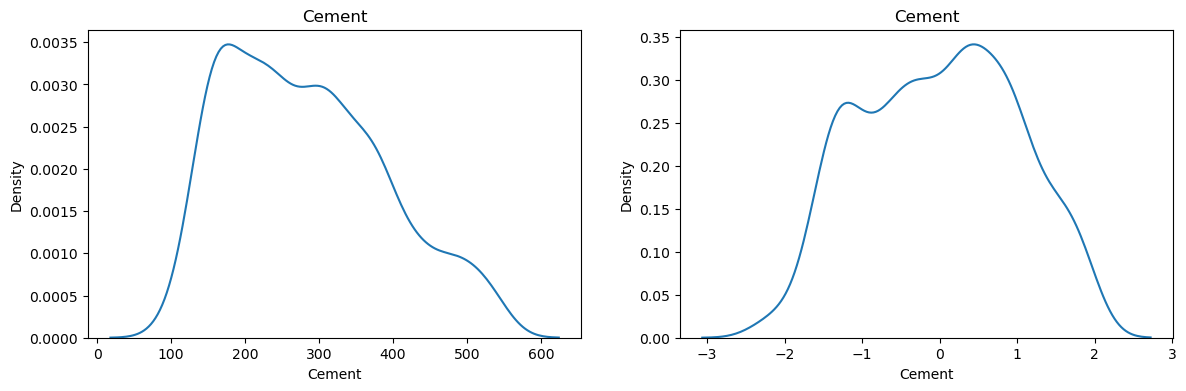

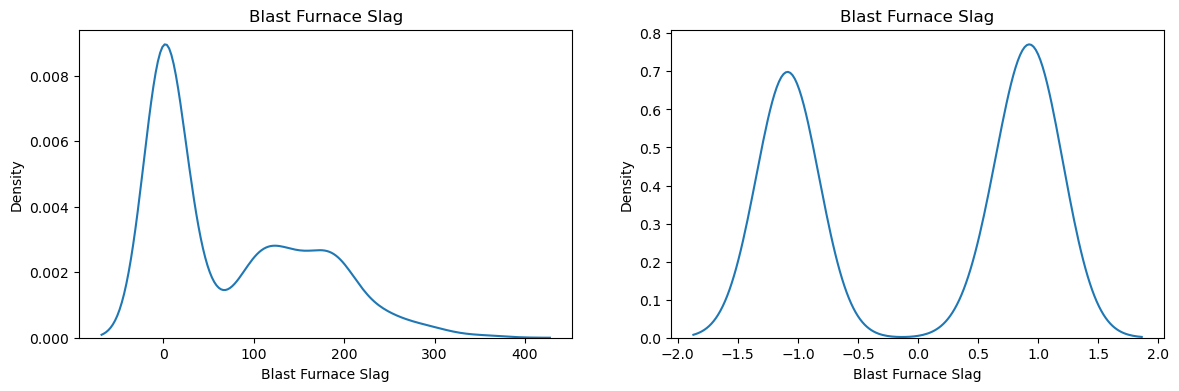

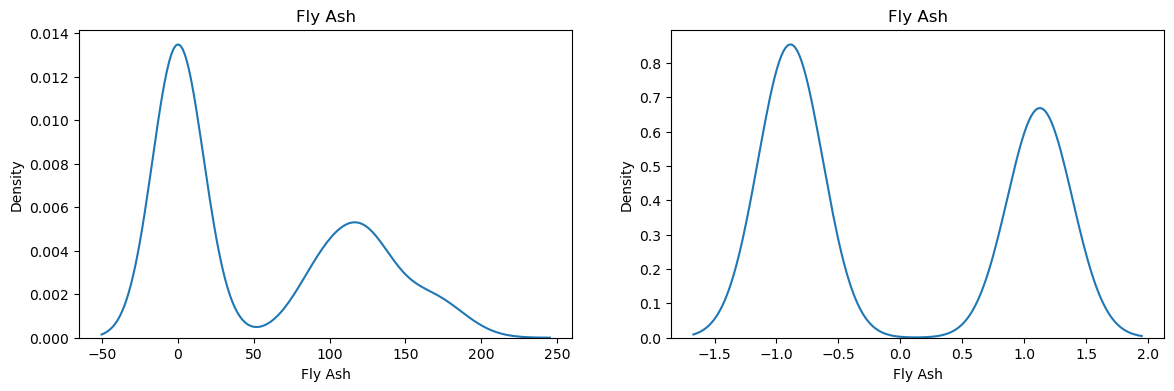

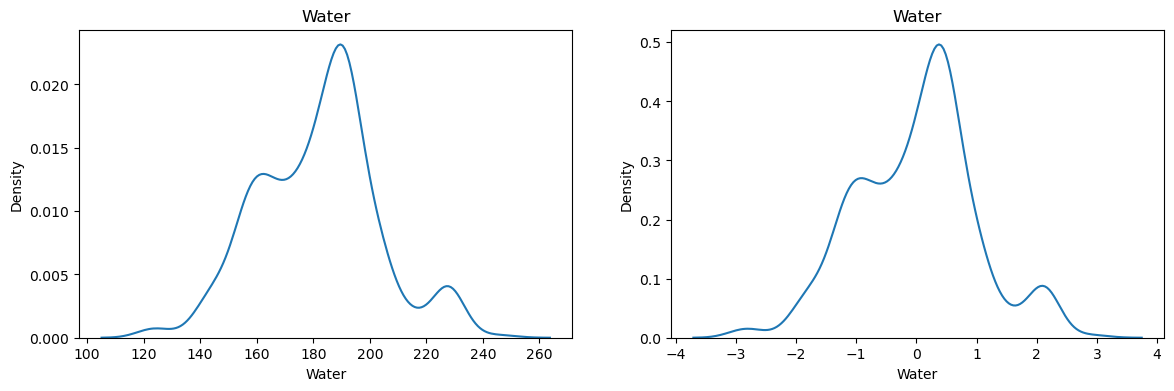

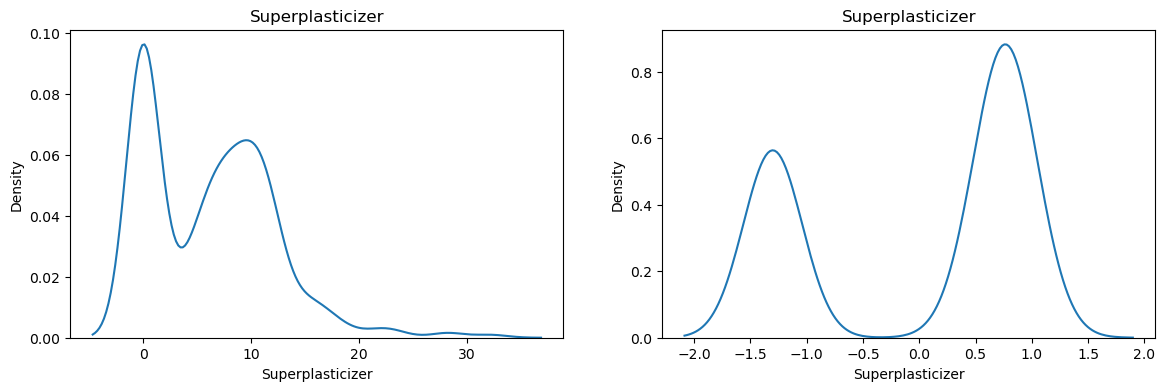

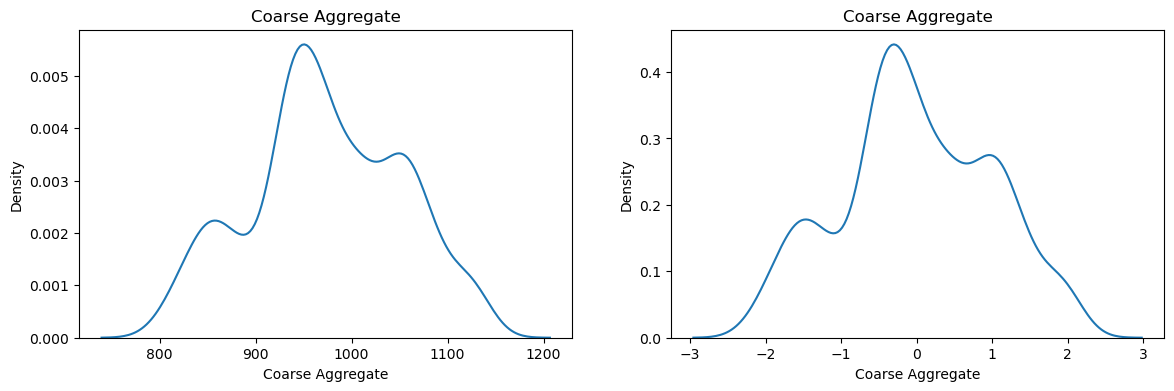

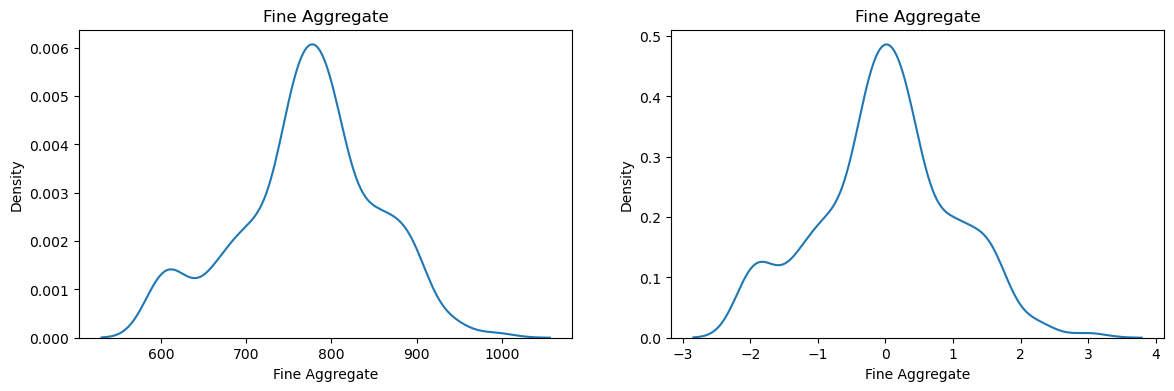

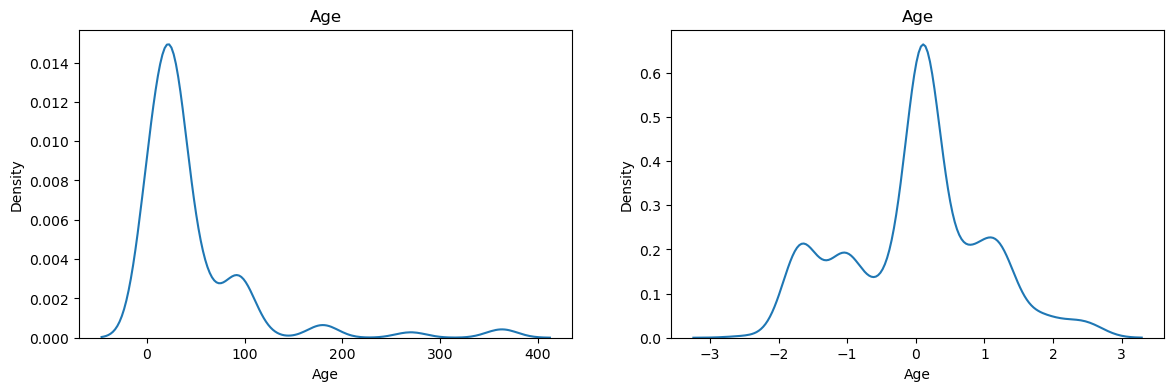

In [60]:

# Before and after comparision for Box-Cox Plot
xtrain_transformed = pd.DataFrame(xtrain_transformed,columns=xtrain.columns)

for col in xtrain_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(xtrain[col])
    plt.title(col)

    plt.subplot(122)
    sns.kdeplot(xtrain_transformed[col])
    plt.title(col)

    plt.show()

In [61]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(xtrain)
X_test_transformed2 = pt1.transform(xtest)

lr = LinearRegression()
lr.fit(X_train_transformed2,ytrain)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(ytest,y_pred3))

pd.DataFrame({'cols':xtrain.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906513354854


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [62]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625141500865

In [64]:

X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=xtrain.columns)

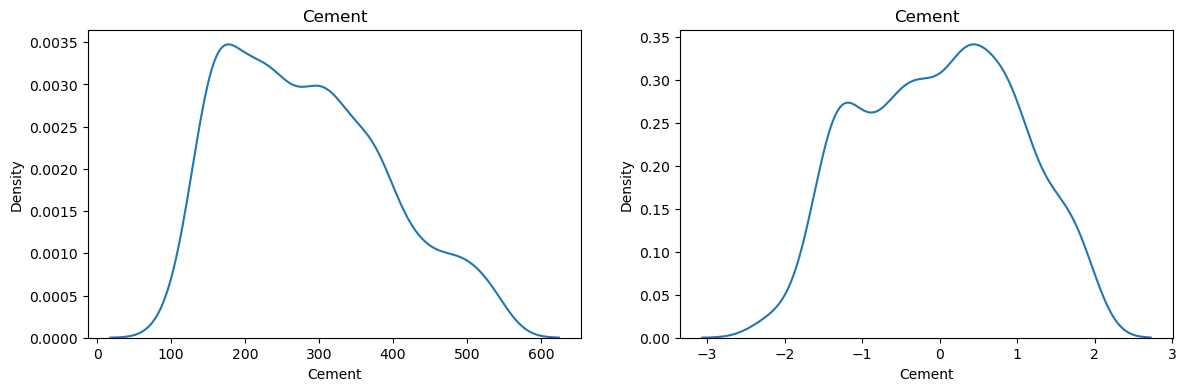

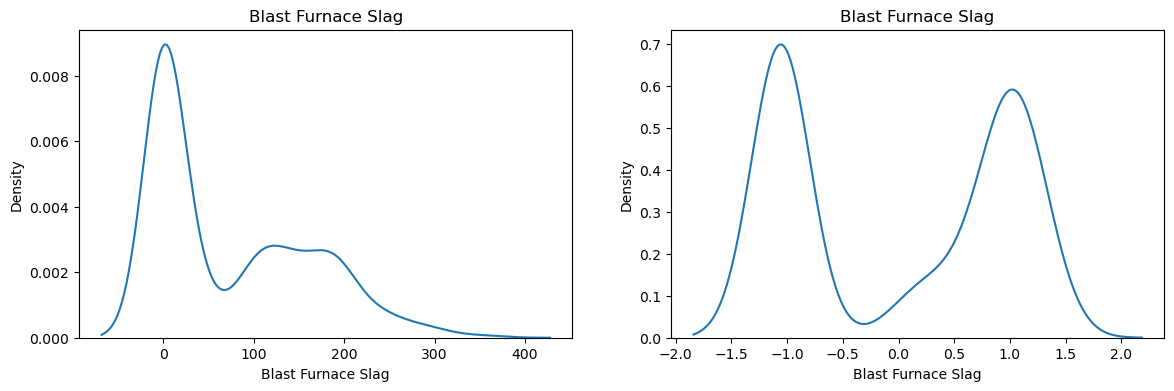

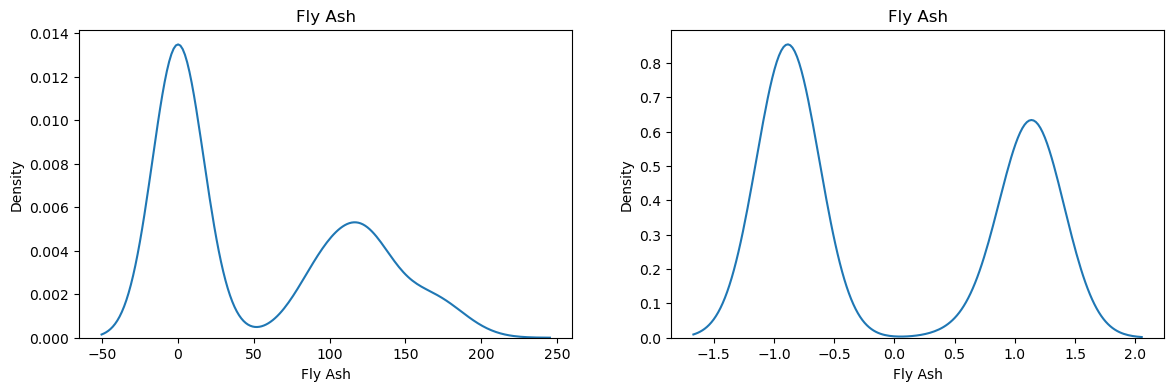

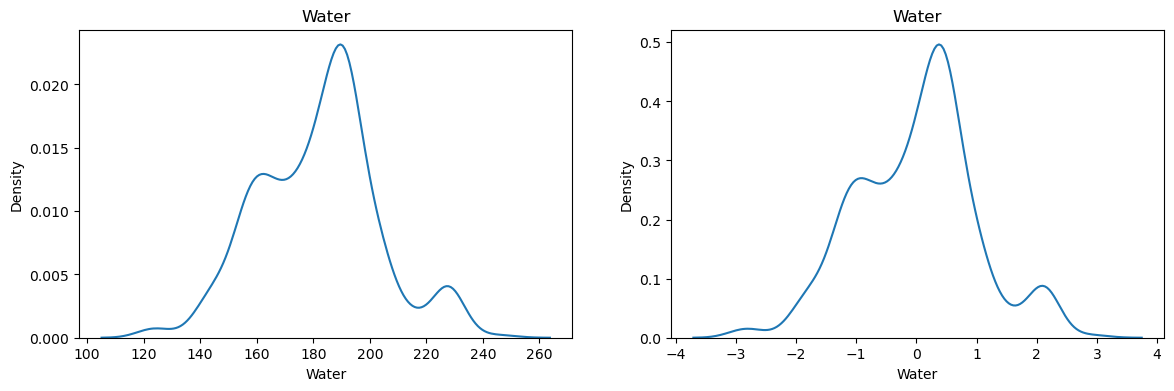

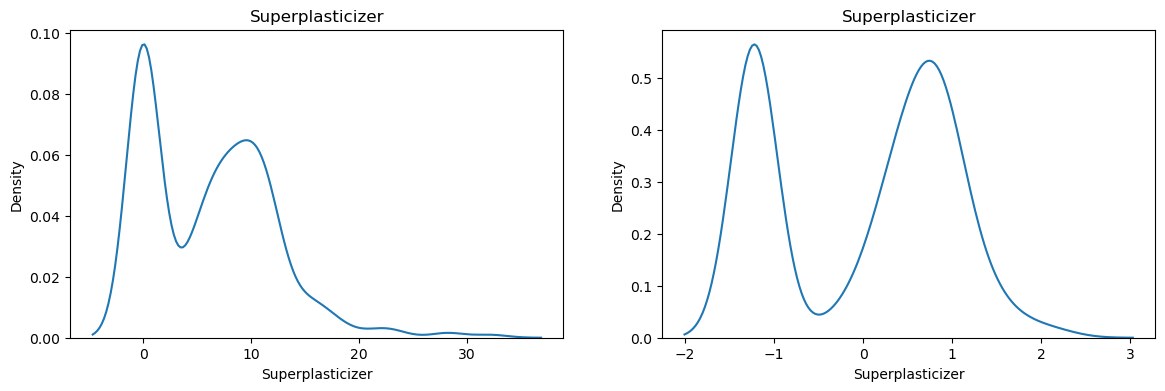

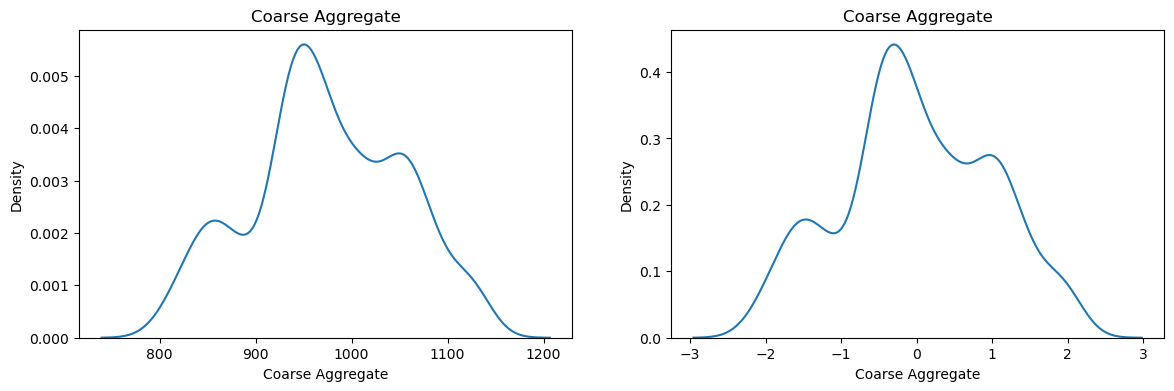

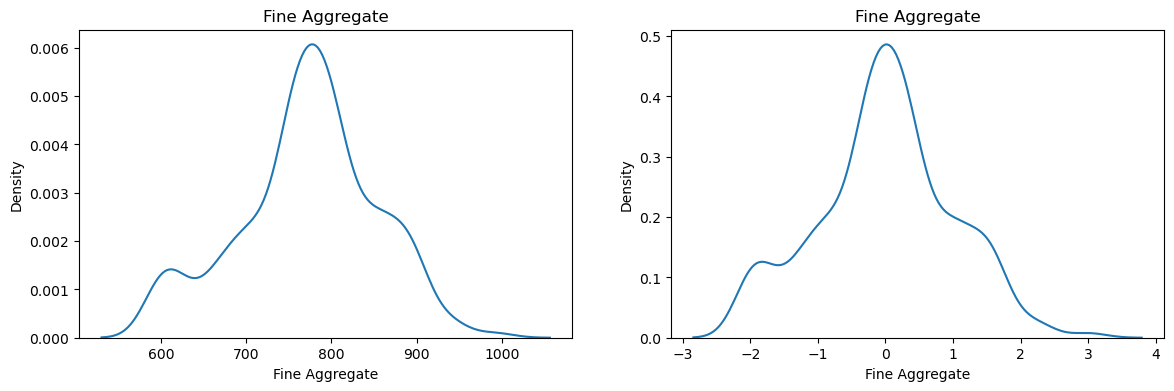

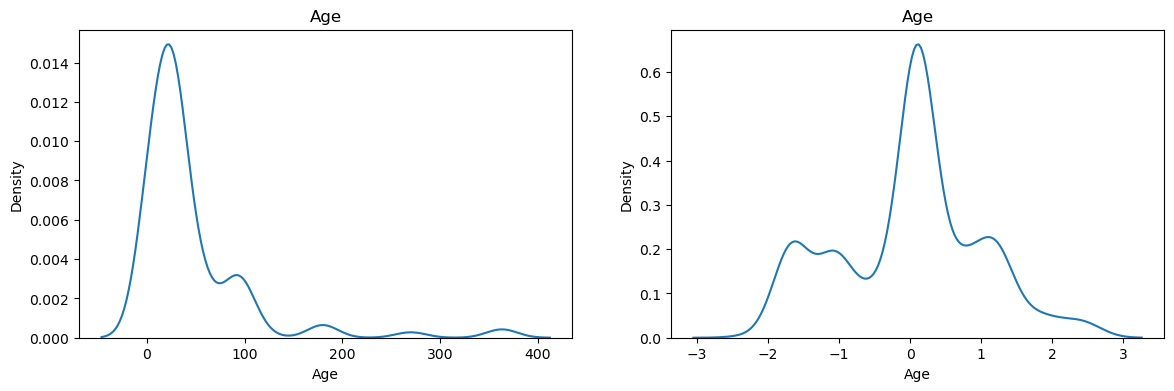

In [66]:

# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(xtrain[col])
    plt.title(col)

    plt.subplot(122)
    sns.kdeplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

In [68]:
pd.DataFrame({'cols':xtrain.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885
